# Analisi CMR
#### Claudia Gabriela Ochoa Martinez (2020)
##### Verifica numero di soggetti catturati in base al sesso e orario di cattura. 

In [1]:
library(dplyr)
library(gridExtra)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




##### Carichiamo i dati relative alle catture ed sforzo di campionamento

In [2]:
Daticatt <- read.csv("Dati-elaborati\\Dati-catture.csv", dec=",", sep=";", header = TRUE)
Datioccas <- read.csv("Dati-elaborati\\Dati-occasioni.csv", dec=",", sep=";", header = TRUE)
head(Daticatt)

,ID_cattura,ALBA,sessione,occasione,ID_TRAPPOLA,chip,ricattura,pelo,peso..g.,sex,eta,statoripr,NOTE,DOY,Data_R,Anno
,<int>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<int>
1,1,T,1,1,11,1315302,N,NA,36,F,A,NR,NA,243,2014-08-31,2014
2,2,A,1,2,6,NA,N,SI,35,F,A,NR,NA,244,2014-09-01,2014
3,3,A,1,2,11,NA,N,SI e,41,M,A,R,NA,244,2014-09-01,2014
4,4,A,1,2,35,1314921,N,NA,39,F,A,NA,NA,244,2014-09-01,2014
5,5,A,1,2,45,1314375,N,NA,33,M,G,NR,NA,244,2014-09-01,2014
6,6,T,1,3,26,1314305,N,NA,45,M,A,R,NA,244,2014-09-01,2014


#### Creiamo un nuovo data frame per verificare, sesso ed età degli individui catturati ogni anno

In [3]:
analisi_sex_age <- subset(Daticatt,select= c(sessione,Anno,sex,eta))
tail(analisi_sex_age)

,sessione,Anno,sex,eta
,<int>,<int>,<fct>,<fct>
389,2,2018,M,A
390,2,2018,F,A
391,2,2018,NA,NA
392,1,2019,M,A
393,1,2019,F,A
394,2,2019,F,NA


#### Visualizziamo il numero di catture per ciascun anno

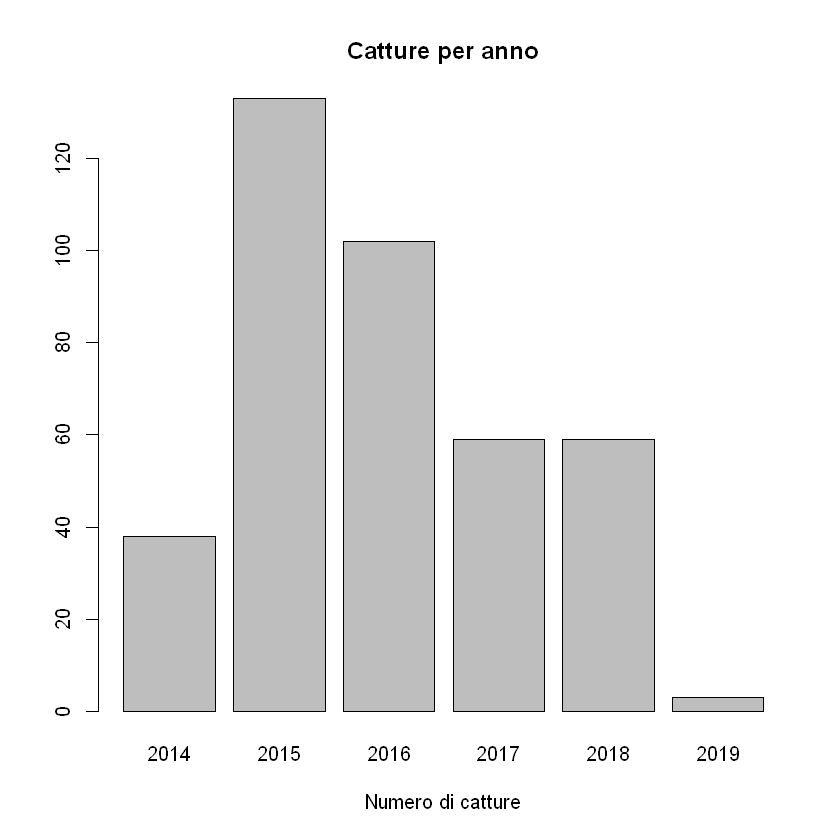

In [4]:
n_catt_anno <- table(analisi_sex_age$Anno) 
barplot(n_catt_anno, main="Catture per anno",xlab="Numero di catture") 

#### E'possible anche verificare per ciascun anno, quanti individui per ogni sesso ed età sono stati catturati, cambiando semplicemente l'anno nel codice seguente

In [5]:
#analisi_sex_age_$sex <-  as.character(analisi_sex_age$sex)
#analisi_sex_age_$eta <-  as.character(analisi_sex_age$eta)

analisi_sex_age_ <- analisi_sex_age %>%
  rename(Sesso = sex, Eta = eta) %>%
  mutate(Sesso = sub("F", "Femmina", Sesso)) %>%
  mutate(Sesso = sub("M", "Maschio", Sesso)) %>%
  mutate(Eta = sub("A", "Adulto", Eta)) %>%
  mutate(Eta = sub("G", "Giovane", Eta)) 
head(analisi_sex_age_)

,sessione,Anno,Sesso,Eta
,<int>,<int>,<chr>,<chr>
1,1,2014,Femmina,Adulto
2,1,2014,Femmina,Adulto
3,1,2014,Maschio,Adulto
4,1,2014,Femmina,Adulto
5,1,2014,Maschio,Giovane
6,1,2014,Maschio,Adulto


### Conteggio numero di soggetti catturati, sesso ed età nel corso dell’estate 2018 

In [6]:
subject_year = "2018"
subject_session = "1"
analisi_sex_age_tbl <- analisi_sex_age_ %>%
  filter(Anno == subject_year, sessione == subject_session) %>%
  count(sessione, Sesso, Eta) %>%
  group_by(Sesso, Eta) 
analisi_sex_age_tbl
#summarise(Totale = sum(n))
#analisi_sex_age_tbl <- data.frame(analisi_sex_age_tbl)
#analisi_sex_age_tbl
colnames(analisi_sex_age_tbl) <- c("Sessione", "Sesso", "Età", "Totale")
#view(analisi_sex_age_tbl)

tt <- ttheme_minimal(
     core=list(bg_params = list(fill = blues9[1:4], col=NA),
     fg_params=list(fontface=3)),
    colhead=list(fg_params=list(col="navyblue", fontface=4L)),
    rowhead=list(fg_params=list(col="black", fontface=3L)))

sessione,Sesso,Eta,n
<int>,<chr>,<chr>,<int>
1,Femmina,Adulto,13
1,Maschio,Adulto,11
1,Maschio,Giovane,4
1,NA,Giovane,1


In [7]:
a_2018_1 <- analisi_sex_age_ %>%
  filter(Anno == subject_year, sessione == subject_session) %>%
  count(sessione, Sesso, Eta) %>%
  group_by(Sesso, Eta) 
colnames(a_2018_1) <- c("Sessione", "Sesso", "Età", "Totale")
a_2018_2 <- analisi_sex_age_ %>%
  filter(Anno == subject_year, sessione == 2) %>%
  count(sessione, Sesso, Eta) %>%
  group_by(Sesso, Eta) 
colnames(a_2018_2) <- c("Sessione", "Sesso", "Età", "Totale")

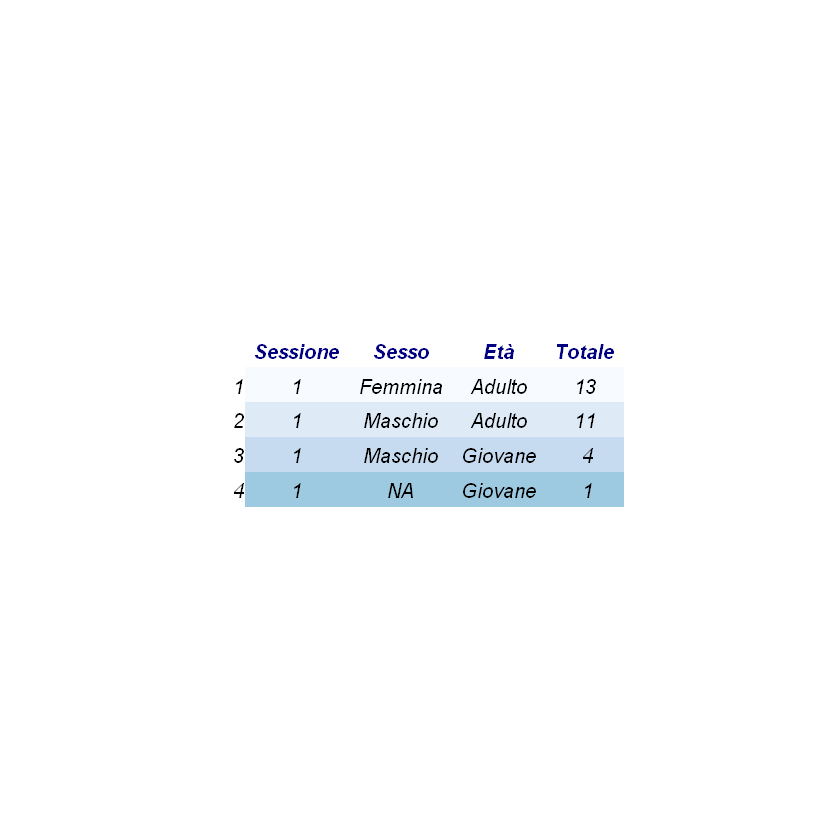

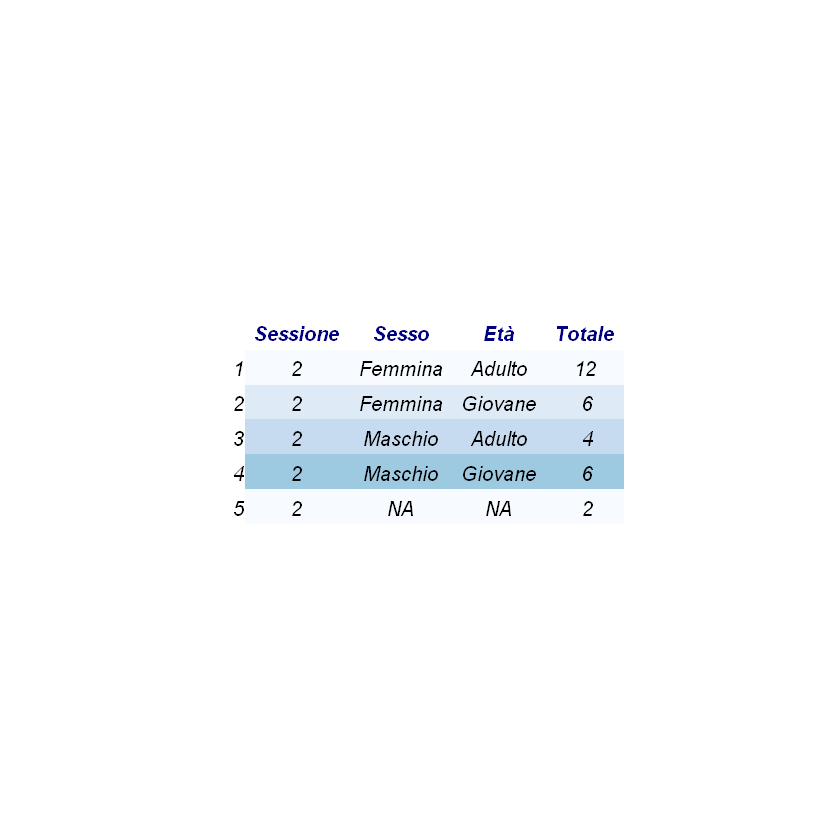

In [8]:
CMRtab1<- grid.arrange(
  tableGrob(a_2018_1, theme=tt),
   nrow=1)
CMRtab1<- grid.arrange(
  tableGrob(a_2018_2, theme=tt),
   nrow=1)
#ggsave(file = "img/CMR1.jpg", CMRtab1)
#ggsave(file = "img/CMR2.jpg", CMRtab2)

### Numero di occasioni ed aventi di cattura tra alba e tramonto nel corso dell’estate 2018 

In [9]:
anno_analisi <- "2018"

occasioni_anno_analisi <- Datioccas %>%
  filter(Anno == anno_analisi) %>%
  count(ALBA..A.T.) %>%
  group_by(ALBA..A.T.) 
colnames(occasioni_anno_analisi) <- c("","Occasioni di cattura")
head((occasioni_anno_analisi))

,Occasioni di cattura
<fct>,<int>
A,17
T,18


In [10]:

catture_anno_analisi <- Daticatt %>%
  filter(Anno == anno_analisi) %>%
  count(ALBA) %>%
  group_by(ALBA)
colnames(catture_anno_analisi) <- c("","Eventi di cattura")
head((catture_anno_analisi))

,Eventi di cattura
<fct>,<int>
A,34
T,25


In [11]:
occas_catt_anno_analisi <- t(merge(occasioni_anno_analisi,catture_anno_analisi))

colnames(occas_catt_anno_analisi) <- c("Alba", "Tramonto")
occas_catt_anno_analisi <- occas_catt_anno_analisi[-1,]
occas_catt_anno_analisi

,Alba,Tramonto
Occasioni di cattura,17,18
Eventi di cattura,34,25


In [12]:
rapporto_alba <- as.numeric(occas_catt_anno_analisi[,"Alba"]["Eventi di cattura"])/as.numeric(occas_catt_anno_analisi[,"Alba"]["Occasioni di cattura"])
rapporto_tramonto <- as.numeric(occas_catt_anno_analisi[,"Tramonto"]["Eventi di cattura"])/as.numeric(occas_catt_anno_analisi[,"Tramonto"]["Occasioni di cattura"])
occas_catt_anno_analisi <- rbind(occas_catt_anno_analisi,cbind(signif(rapporto_alba, digits = 3), signif(rapporto_tramonto,digits = 3)))


In [13]:
rownames(occas_catt_anno_analisi) <- c("Occasioni di cattura","Eventi di cattura","Rapporto Catture/Occasioni")
occas_catt_anno_analisi

,Alba,Tramonto
Occasioni di cattura,17,18
Eventi di cattura,34,25
Rapporto Catture/Occasioni,2,1.39


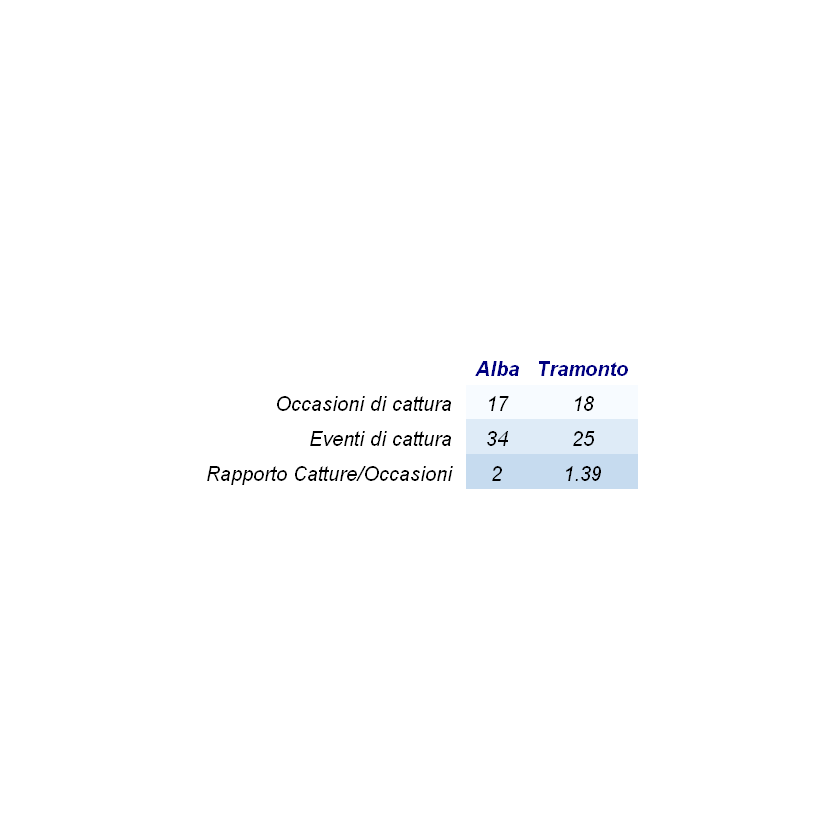

In [14]:
occas_analisi_temp_ <- grid.arrange(
  tableGrob(occas_catt_anno_analisi, theme=tt),
   nrow=1)

#ggsave(file = "img/occas_analisi_temp_.jpg", occas_analisi_temp_)